In [1]:
%matplotlib inline
## this command allows us to print figures within the notebook and not in a pop up window

## here's where we import all of the modules/packages we want
import matplotlib.pyplot as plt # import ... as ... is almost like aliasing in that you can put anything you want after "as"
import numpy as np # there are standard abbreviations, though, for most packages; numpy contains most basic math commands

We may have to install some of these packages, so let's open a(nother) terminal window -- if you're working in an environment, make sure to source it now -- then we can use _pip install ..._ or _conda install ..._ to download the relevant packages. You only need to do this once per package per environment, though if a package breaks you may have to re-install it.

Further, nowadays, newer versions of Jupyter notebooks will allow you to install packages right from the notebook. In a new cell, you can try _!pip install ..._ to download packages directly. Be aware that for newer Macs (and possibly other computers/OSs) your Jupyter notebook may default to zshell instead of bash or vice versa regardless of your terminal settings.

Some basic packages that we have not already imported that may be of interest are:
- _scipy_: has a lot of built in stats/scientific functions like probability distributions or curve fitting
- _math_: most of these functions are covered by numpy, but some people use/prefer it
- _random_: good for generating (pseudo-)random numbers/seeds
- _pandas_: really common data science way to read ASCII and other text files and manipulate data/dataframes
- _astropy_: open source astronomy utilities; important resource for any astronomer! 

For the purposes of this tutorial, we're going to essentially examine the many ways one can generate a line in Python. This will allow us to examine the various (basic) operations available to us and ultimately the breadth of potential ways to solve even a single simple problem. If you have no plotting experience, this will also serve as an introduction to matplotlib.

Let's get started!

# Numpy

We'll begin with some of numpy's common functions to generate the data for a line.

Let's start by generating data sampled over linear space in x:

In [6]:
x = np.linspace(0, 100, 10) # this function generates a numpy array with 10 values evenly spaced between 0 and 100
# for certain applications, an alternative to linspace is np.arange(a, b), which generates sequential integers in the range [a, b)
#                                            if only a single number is specified (e.g., np.linspace(a)), then the range is [0, a)

Now let's say that we want to generate our y-values via _y = mx + b_ for _m = 2_ and _b = 4._

Because x is already an array, we can simply define:

In [7]:
m = 2
b = 4
y = m*x + b

What would happen if x were a list, though? What about a pandas series or other data type? Think it through and/or test it out below!

In [5]:
x = [x]
y = m*x + b

TypeError: can only concatenate list (not "int") to list

Now let's plot our result.

First we have to instantiate the figure object (the optional argument 'figsize' allows us to set the dimensions of our plot). As with many (though not all) parameteres in packages' built-in functions, if left unspecified, it will default to some set value.

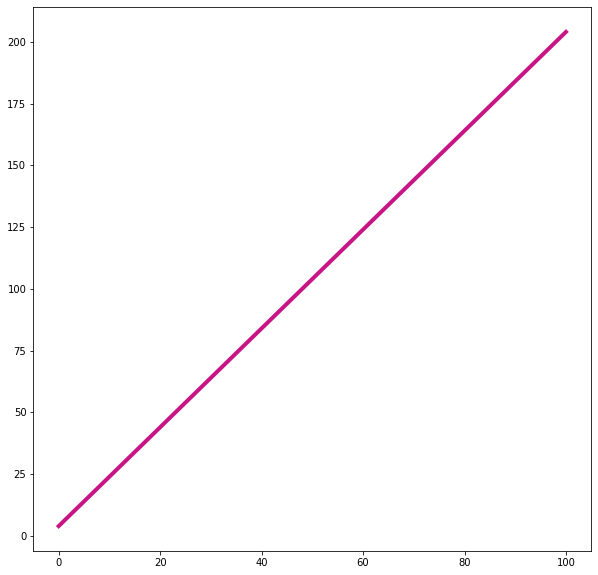

In [8]:
fig = plt.figure(figsize = (10, 10))
plt.plot(x, y, color = 'mediumvioletred', lw = 4.)

The 'color' argument allows us to set the color of the line (see other options [here](https://matplotlib.org/stable/gallery/color/named_colors.html)), and 'lw' allows us to set the width of the line. There are many other commands in matplotlib that you'll discover over time -- the best way to learn these will be to play around when you're plotting and discover the style elements that you like best/best serve in conveying the science.

We can also sample in logarithmic space.

In [9]:
xlog = np.logspace(0, 2, 10) #this function generates a numpy array with 10 values spaced logarithmically between 10**0 and 10**2

ylog = m*xlog + b #because we've created a new x variable, we should recalculate y

How do you expect this result to look relative to the first plot? Different?

Let's check the sampling by plotting the data again, but this time, let's actually plot the individual points.

There are several ways to do this, but we'll use matplotlib's built-in scatter function.

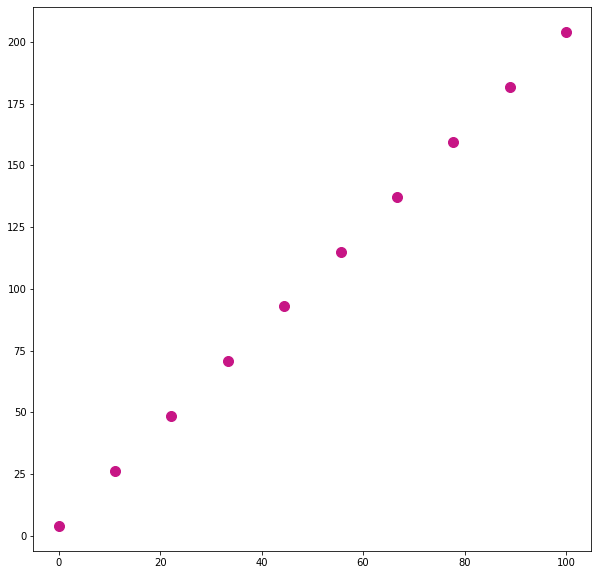

In [10]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(x, y, color = 'mediumvioletred', s = 100)

What would be the best way to compare how these two numpy sampling routines work? I'll give you a hint.

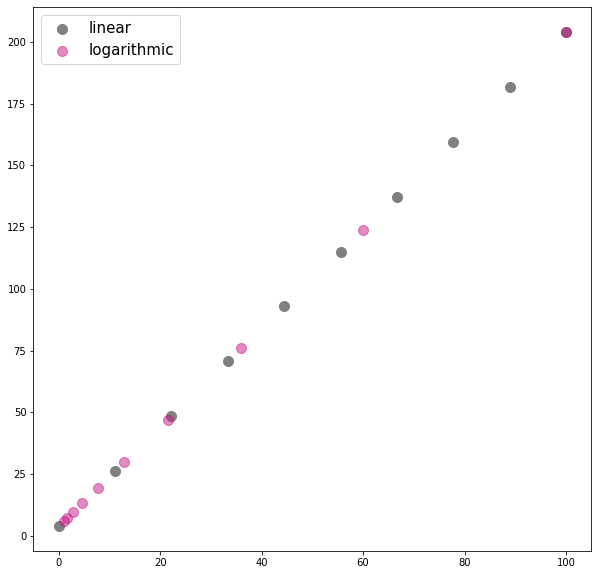

In [12]:
fig = plt.figure(figsize = (10, 10))
plt.scatter(x, y, color = 'gray', label = 'linear', s = 100)
plt.scatter(xlog, ylog, color = 'mediumvioletred', alpha = 0.5, label = 'logarithmic', s = 100)
plt.legend(loc = 'best', fontsize = 15)

Now we've introduced some new arguments: 'alpha' sets the % transparency for overplotted points, which will allow you to see if any points overlap; 's' is how you set the marker size for scatter plots, making it analoglous to 'lw'; and 'label' allows you to associate a string with the points plotted in that call to plt.scatter, which will show up in your legend. Because you've created labels, though, doesn't mean that a legend will just show up. You have to make an explicit call  -- _plt.legend_.

But wait, there's another way to compare our sampling routines. We can place two plots side-by-side in the same figure.

First let's instantiate the figure __and__ two subplots.

Text(0.5, 1.0, 'logarithmic')

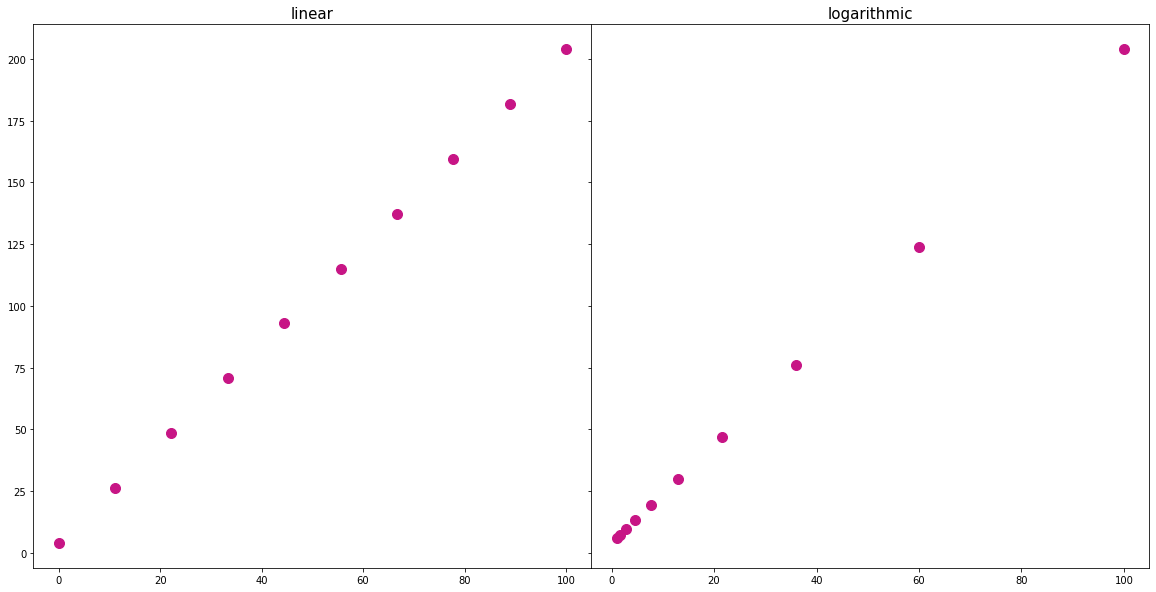

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10), gridspec_kw = {'wspace':0}, sharey = True)
ax1.scatter(x, y, color = 'mediumvioletred', s = 100)
ax1.set_title('linear', fontsize = 15)
ax2.scatter(xlog, ylog, color = 'mediumvioletred', s = 100)
ax2.set_title('logarithmic', fontsize = 15)

Now we're creating two columns of subplots in the same row -- 'sharey = True' allows you to essentially merge the same plots and 'gridspec_kw' offers additional formatting; in this case 'wspace' refers to the width space (the white space between columns).

Note that for a figure __without__ subplots, you would use plt.title(''), the same is true for xlabel, ylabel, xscale, yscale, ...

***

# Lists

This is an approach that can be useful when you don't have an easy way to sample points from a uniform distribution (linearlly or logarithmically). Remember, though, that lists act differently than arrays do.

Let's start with a list of x points.

In [14]:
x = [0.001, 0.5, 0.6, 1., 1.001, 2.8, 5.9, 6., 6.88, 8.4, 9.1, 9.999, 10., 50, 65., 68.9, 70., 89.999, 90.0001, 100.]

Try to act on it the same way we did the arrays.

In [15]:
y = m*x + b

TypeError: can only concatenate list (not "int") to list

Doesn't work, huh?

You have three options -- two that maintain the data type, and a third, which is to simply convert the list to an array.

In [16]:
x = np.array(x)

y = m*x + b

Now plot your line and its constituent points below.

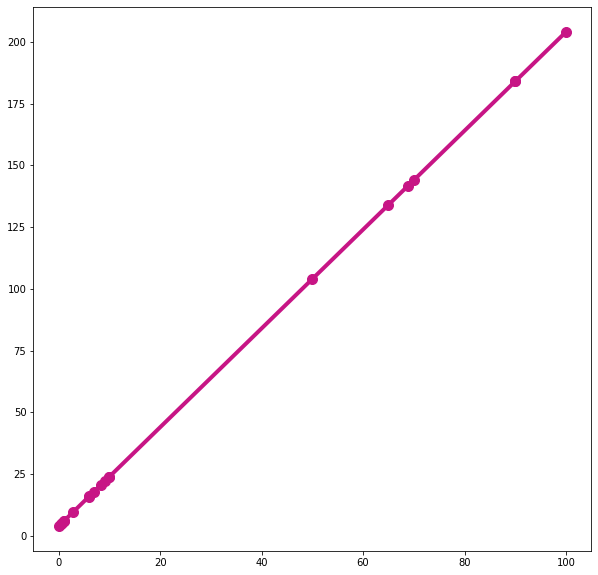

In [17]:
fig = plt.figure(figsize = (10, 10))
plt.plot(x, y, color = 'mediumvioletred', lw = 4.)
plt.scatter(x, y, color = 'mediumvioletred', s = 100)

We are working with lists, though, so let's make sure that x remains a list.

To convert between an array and a list, just surround it with brackets or use _list()_:

In [18]:
x = list(x)

Now we have two options, which (you should come to realize) are really one and the same.

### For loop

With a 'for loop', we create an empty list for y and then append newly calculated values to it.

In [19]:
y = []

for i in x:
    y_calc = m*i + b
    y.append(y_calc)

Go ahead and plot your output line and points below.

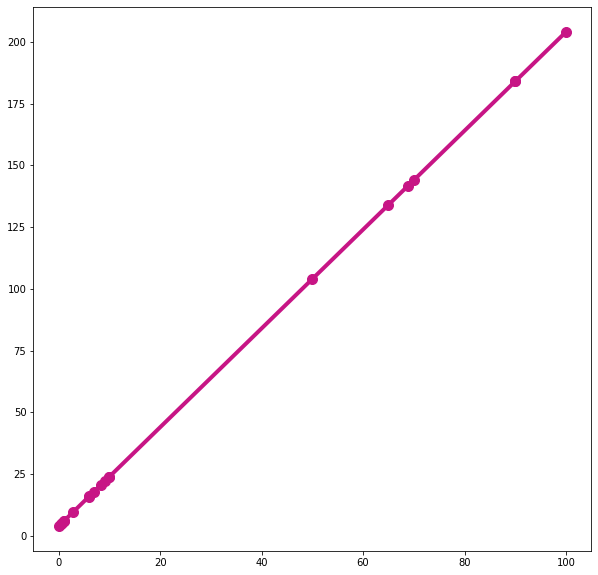

In [20]:
fig = plt.figure(figsize = (10, 10))
plt.plot(x, y, color = 'mediumvioletred', lw = 4.)
plt.scatter(x, y, color = 'mediumvioletred', s = 100)

### List comprehension

Let's condense the 'for loop' into 'list comprehension'.

In [21]:
y = [m*i + b for i in x]

And go ahead and, once again, plot your result:

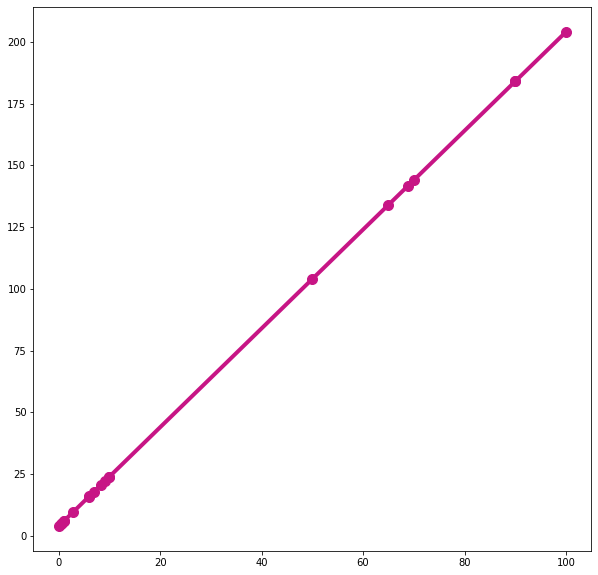

In [22]:
fig = plt.figure(figsize = (10, 10))
plt.plot(x, y, color = 'mediumvioletred', lw = 4.)
plt.scatter(x, y, color = 'mediumvioletred', s = 100)

***

# Functions

There are very few cases in which you'd use a function to plot a simple line, but there are cases where that functional form can be used to __fit__ a line. We'll start by making sure that our function works and then we'll fit some "messy" data with a line using a scipy routine.

We'll generate the function here:

In [23]:
def get_line(x, m = 2, b = 4):
    return m*x + b

Setting _m = 2_ and _b = 4_ within the function does not preclude giving different arguments to get_line(), but it does set these values as defaults, so we only ever need to feed get_line() x-values and it will plot y = 2\*x-values + 4.

To test that our function works, generate an array of x-values and plot the results.

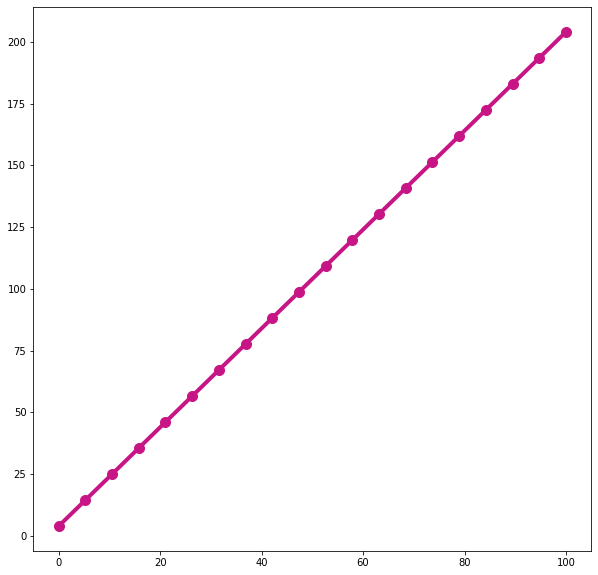

In [24]:
x = np.linspace(0, 100, 20)
y = get_line(x)

fig = plt.figure(figsize = (10, 10))
plt.plot(x, y, color = 'mediumvioletred', lw = 4.)
plt.scatter(x, y, color = 'mediumvioletred', s = 100)

### Fitting data

Where there's no clear relation, or some scatter in the data, we can use curve fitting routines to understand the constants in a provided function.

Let's start by importing the relevant module -- we'll be using scipy.optimize.curve_fit.

In [25]:
from scipy.optimize import curve_fit

Now we need to generate that "messy" data.

In [26]:
x = np.linspace(0, 100, 20)

y = get_line(x) + np.random.normal(size = x.shape)

This cell generates y data using our function for the line and then perturbs those points by some value drawn from a Gaussian (normal) distribution. The argument 'size = x.shape' ensures that the generated array matches the dimensions of x and y so that there isn't a problem with mismatched indices.

This is a good opportunity to get accustomed to reading through the documentation. Here's the [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html).

Let's fit our data:

In [27]:
popt, pcov = curve_fit(get_line, x, y)

We can further break up popt into the two variables for which we're actually fitting -- _m_ and _b_.

In [28]:
m, b = popt

print('Our data were best fit by a line with a slope of %.2f and an intercept of %.2f.'%(m, b))

Our data were best fit by a line with a slope of 2.00 and an intercept of 4.27.


If we want to quickly plot our result, we can either feed get_line x, m, and b, or use the entire popt tuple: get_line(x, m, b) = get_line(x, \*popt).

Plot both your data points and your output line below.

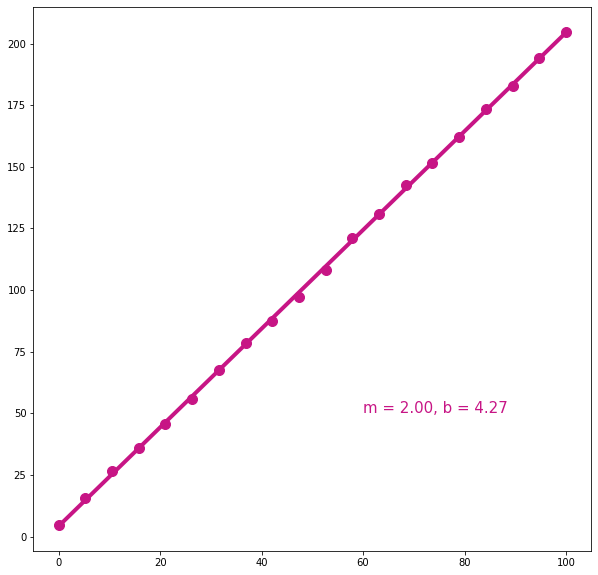

In [29]:
fig = plt.figure(figsize = (10, 10))
# plt.plot(x, get_line(x), color = 'gray', lw = 4.)
# plt.text(20, 175, s = 'm = 2, b = 4', color = 'gray', fontsize = 15)
plt.plot(x, get_line(x, *popt), color = 'mediumvioletred', lw = 4.)
plt.text(60, 50, s = 'm = %.2f, b = %.2f'%(m, b), color = 'mediumvioletred', fontsize = 15)
plt.scatter(x, y, color = 'mediumvioletred', s = 100)

***

# Exercise

Going back to the quick means of generating data with numpy, generate both linearly sampled and logarithmically sampled data across the same range. Perturb these data in the y-direction, and fit a line to both sets of data. Plot both your perturbed generated data and the lines derived from fitting those data in individual subplots, one linear, one log. Compare your results.

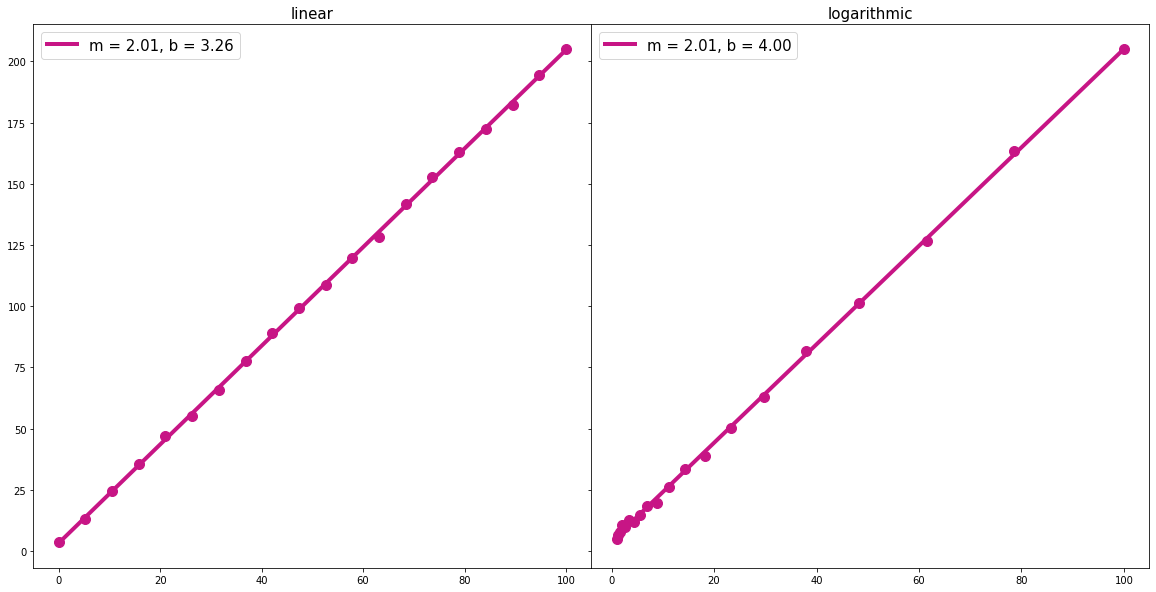

In [30]:
x = np.linspace(0, 100, 20)
y = get_line(x) + np.random.normal(size = x.shape)

xlog = np.logspace(0, 2, 20)
ylog = get_line(xlog) + np.random.normal(size = xlog.shape)

popt, pcov = curve_fit(get_line, x, y)
popt_log, pcov_log = curve_fit(get_line, xlog, ylog)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20, 10), sharey = True, gridspec_kw = {'wspace':0})
ax1.scatter(x, y, color = 'mediumvioletred', s = 100)
ax1.plot(x, get_line(x, *popt), color = 'mediumvioletred', lw = 4., label = 'm = %.2f, b = %.2f'%(popt[0], popt[1]))
ax1.set_title('linear', fontsize = 15)
ax1.legend(loc = 'upper left', fontsize = 15)
ax2.scatter(xlog, ylog, color = 'mediumvioletred', s = 100)
ax2.plot(xlog, get_line(xlog, *popt_log), color = 'mediumvioletred', lw = 4., label = 'm = %.2f, b = %.2f'%(popt_log[0], popt_log[1]))
ax2.set_title('logarithmic', fontsize = 15)
ax2.legend(loc = 'upper left', fontsize = 15)